<h1>EDA, Exploratory Data Analysis / Исследовательский анализ данных</h1>

Калинин Дмитрий Александрович

БСА21-01


# Импорт пакетов 

In [433]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [434]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# 1) Постановка задачи

**Название задачи - Airfoil Self-Noise Data Set**

Тип задачи - регрессия

Ссылка на задачу:

https://archive.ics.uci.edu/ml/datasets/Airfoil+Self-Noise


Сыылка на БД:

https://archive.ics.uci.edu/ml/machine-learning-databases/00291/airfoil_self_noise.dat 


**Кратое описание (перевести на русский, что в данных, смысл, что надо с ними сделать)**

We perform energy analysis using 12 different building shapes simulated in Ecotect. The buildings differ with respect to the glazing area, the glazing area distribution, and the orientation, amongst other parameters. We simulate various settings as functions of the afore-mentioned characteristics to obtain 768 building shapes. The dataset comprises 768 samples and 8 features, aiming to predict two real valued responses. It can also be used as a multi-class classification problem if the response is rounded to the nearest integer.
Мы производим анализ затраченной энергии, использую 12 различных форм строений, симулированных в Ecotect. Строения различаются по площади остекления и этой площади распределению, ориентацией посредь других параметров. Симулируя различные настройки как функции упомянутых ранее характеристик, мы получили 768 форм строений. В БД представлены 768 примеров и 8 параметров, нацеленных на прогнозирование 2 реально важных измерений. Данная задача также может быть использована в качестве многоклассовой классификации, если измерение округлено в сторону ближайшего целого числа.

Attribute Information:

The dataset contains eight attributes (or features, denoted by X1...X8) and two responses (or outcomes, denoted by y1 and y2). The aim is to use the eight features to predict each of the two responses.
Датасет содержит 8 независимых переменных, названных X1...X8 и две зависимых переменных, выходов -- y1 и y2. Цель -- использовать эти 8 независимых переменных для предсказания вывода.
**Описание независимых переменных (если есть информация, перевести на русский)**
1. Relative Compactness -- Относительная компактность
2. Surface Area -- Площадь поверхности
3. Wall Area -- Площадь стен
4. Roof Area -- Площадь крыши
5. Overall Height -- Высота
6. Orientation -- Ориентация
7. Glazing Area -- Площадь остекления
8. Glazing Area Distribution -- Распределения площади остекления

**Описание целевых переменных: (если есть информация, перевести на русский)**
1. Cooling Load

# 2) Импорт данных

импорт "сырых" (raw) данных из источника

In [435]:
data_raw = pd.read_excel('https://archive.ics.uci.edu/ml/machine-learning-databases/00242/ENB2012_data.xlsx',
                         header=None).iloc[1:, :]
data_raw.head(3)

,0,1,2,3,4,5,6,7,8,9
1,0.98,514.5,294,110.25,7,2,0,0,15.55,21.33
2,0.98,514.5,294,110.25,7,3,0,0,15.55,21.33
3,0.98,514.5,294,110.25,7,4,0,0,15.55,21.33


In [436]:
data_raw.tail(3)

,0,1,2,3,4,5,6,7,8,9
766,0.62,808.5,367.5,220.5,3.5,3,0.4,5,16.44,17.11
767,0.62,808.5,367.5,220.5,3.5,4,0.4,5,16.48,16.61
768,0.62,808.5,367.5,220.5,3.5,5,0.4,5,16.64,16.03


## Выводы

Данные импортированы корректно. Структура первых и последних строк совпадает. Нет названий стролбцов.

In [437]:
data_raw.columns = ['Relative Compactness',
                    'Surface Area',
                    'Wall Area',
                    'Roof Area',
                    'Overall Height',
                    'Orientation',
                    'Glazing Area',
                    'Glazing Area Distribution',
                    'Heating Load',
                    'Cooling Load']

data_raw = data_raw.drop(columns=['Heating Load']).reset_index(drop=True)
data_raw.head(3)

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Cooling Load
0,0.98,514.5,294,110.25,7,2,0,0,21.33
1,0.98,514.5,294,110.25,7,3,0,0,21.33
2,0.98,514.5,294,110.25,7,4,0,0,21.33


Списки числовых и категориальных данных.

Далее можно выбирать данные одной из групп, не перечисляя их.

In [438]:
numerical_names = ['Relative Compactness',
                   'Surface Area',
                   'Wall Area',
                   'Roof Area',
                   'Overall Height',
                   'Orientation',
                   'Glazing Area',
                   'Glazing Area Distribution',
                   'Cooling Load']
categorical_names = []

# 3) Визуализация в табличном виде. Описательная статистика

Цель: проверить объем, форматы, диапазоны, наличие пропусков, сделать выводы.

In [439]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Relative Compactness       768 non-null    object
 1   Surface Area               768 non-null    object
 2   Wall Area                  768 non-null    object
 3   Roof Area                  768 non-null    object
 4   Overall Height             768 non-null    object
 5   Orientation                768 non-null    object
 6   Glazing Area               768 non-null    object
 7   Glazing Area Distribution  768 non-null    object
 8   Cooling Load               768 non-null    object
dtypes: object(9)
memory usage: 54.1+ KB


Описательная статистика для количественных данных.

In [440]:
data_raw[numerical_names].describe()

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Cooling Load
count,768.00,768.0,768.0,768.0,768.0,768,768.0,768,768.00
unique,12.00,12.0,7.0,4.0,2.0,4,4.0,6,636.00
top,0.98,514.5,294.0,220.5,7.0,2,0.1,1,21.33
freq,64.00,64.0,192.0,384.0,384.0,192,240.0,144,4.00


In [441]:
data_raw.dtypes

Relative Compactness         object
Surface Area                 object
Wall Area                    object
Roof Area                    object
Overall Height               object
Orientation                  object
Glazing Area                 object
Glazing Area Distribution    object
Cooling Load                 object
dtype: object

Описательная статистика для категориальных данных (если имеются в задаче).

In [442]:
for n in numerical_names:
    data_raw[n] = data_raw[n].astype(float)

In [443]:
# data_raw[categorical_names].describe()

## Выводы

Среднее не совпадает с медианой - распределение не соотвествует нормальному (требуется проверка).

Диапазоны значений нужно показать предметным экспертам для анализа корректности.

# 4) Визуальный анализ распределений и разброса данных

## 4.1) Графики box-plot (количественные данные) и bar-plot (категориальные данные)

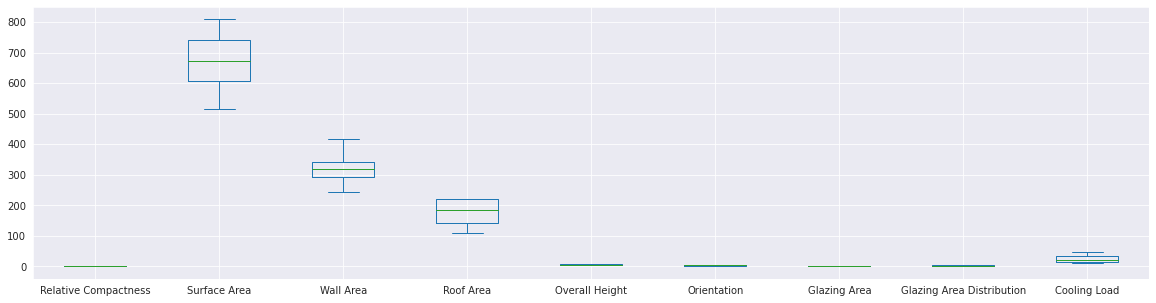

In [444]:
data_raw.plot(kind='box', figsize=(20, 5))
plt.show()

Поскольку диапазоны различаются, на общем графике сложно сравнить разброс для разных столбцов. Лучше разделить.

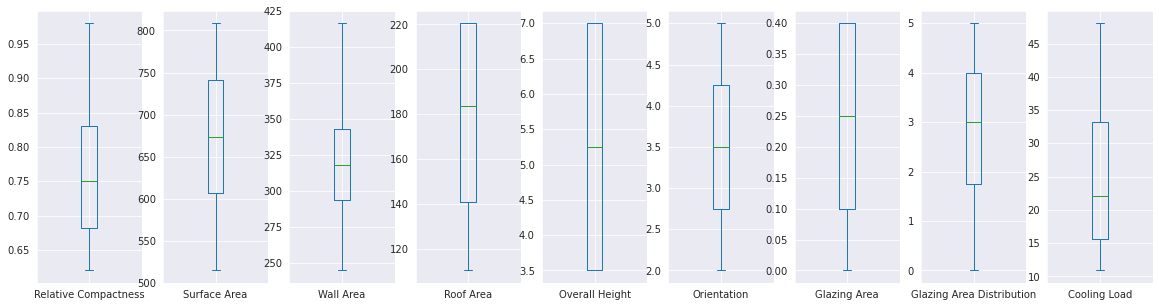

In [445]:
data_raw.plot(kind='box', subplots=True, figsize=(20, 5))
plt.show()

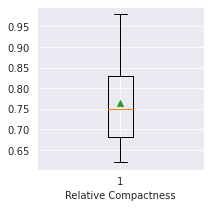

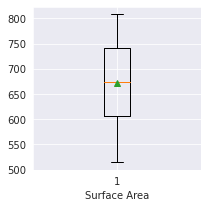

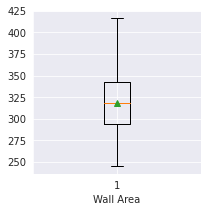

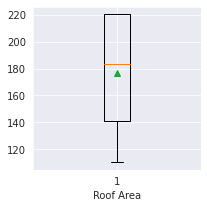

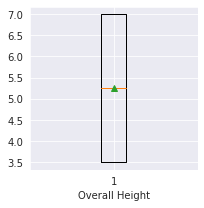

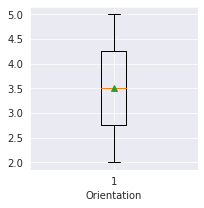

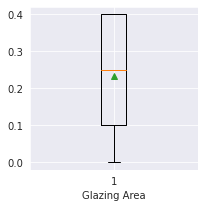

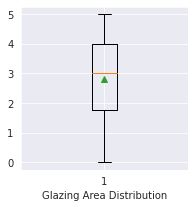

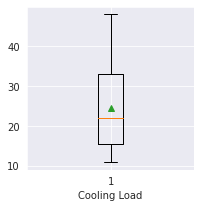

In [446]:
for col in data_raw.columns:
    fig, ax = plt.subplots(figsize=(3, 3))
    ax.boxplot(data_raw[col],
               showmeans=True)
    ax.set_xlabel(col)
    plt.show()

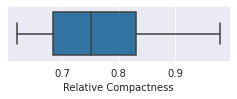

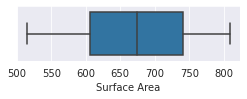

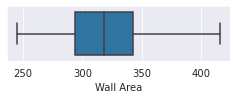

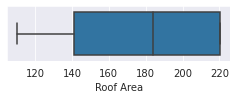

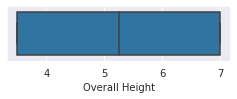

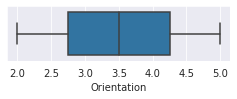

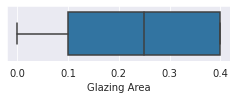

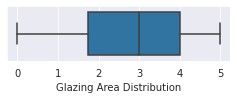

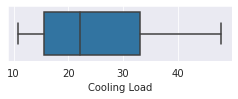

In [447]:
for col in data_raw.columns:
    fig, ax = plt.subplots(figsize=(4, 1))
    sns.boxplot(data=data_raw, x=col, ax=ax)
    plt.show()

## 4.2) Гистограммы с оценкой плотности распределения

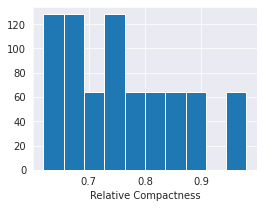

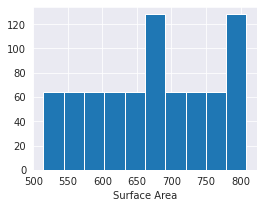

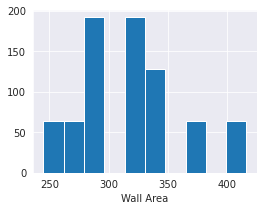

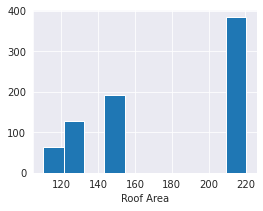

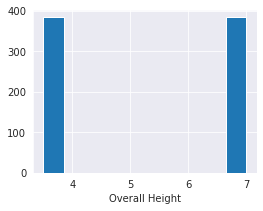

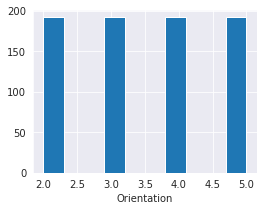

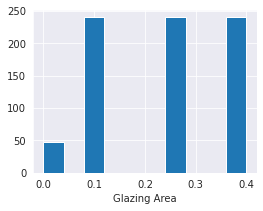

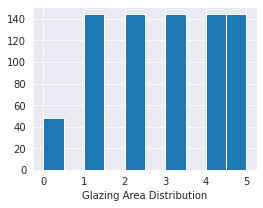

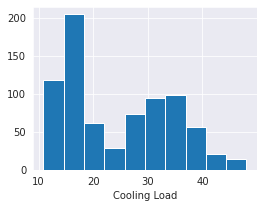

In [448]:
for col in data_raw.columns:
    fig, ax = plt.subplots(figsize=(4, 3))
    ax.hist(data_raw[col])
    ax.set_xlabel(col)
    plt.show()

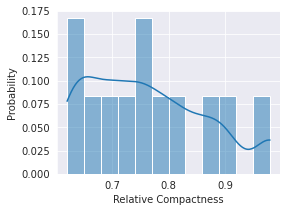

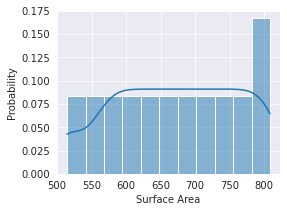

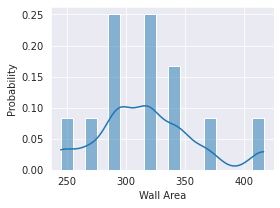

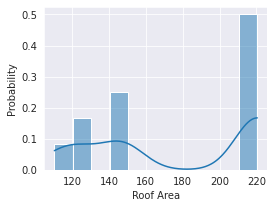

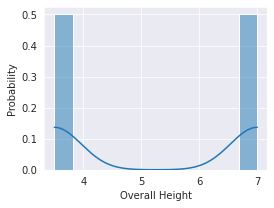

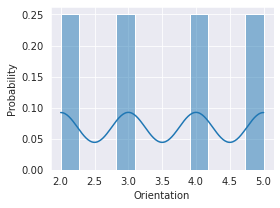

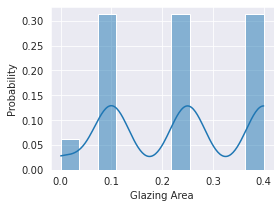

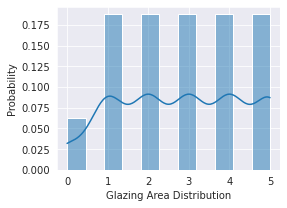

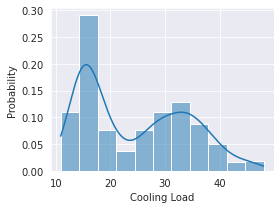

In [449]:
for col in data_raw.columns:
    fig, ax = plt.subplots(figsize=(4, 3))
    sns.histplot(data=data_raw, x=col,
                 kde=True,
                 stat='probability')
    plt.show()

Возникла гипотеза, что несколько показателей являются дискретными, проверим это.

In [450]:
for n in numerical_names:
    print(data_raw[n].value_counts())

0.98    64
0.90    64
0.86    64
0.82    64
0.79    64
0.76    64
0.74    64
0.71    64
0.69    64
0.66    64
0.64    64
0.62    64
Name: Relative Compactness, dtype: int64
514.5    64
563.5    64
588.0    64
612.5    64
637.0    64
661.5    64
686.0    64
710.5    64
735.0    64
759.5    64
784.0    64
808.5    64
Name: Surface Area, dtype: int64
294.0    192
318.5    192
343.0    128
416.5     64
245.0     64
269.5     64
367.5     64
Name: Wall Area, dtype: int64
220.50    384
147.00    192
122.50    128
110.25     64
Name: Roof Area, dtype: int64
7.0    384
3.5    384
Name: Overall Height, dtype: int64
2.0    192
3.0    192
4.0    192
5.0    192
Name: Orientation, dtype: int64
0.10    240
0.25    240
0.40    240
0.00     48
Name: Glazing Area, dtype: int64
1.0    144
2.0    144
3.0    144
4.0    144
5.0    144
0.0     48
Name: Glazing Area Distribution, dtype: int64
21.33    4
29.79    4
14.27    4
17.20    4
14.28    4
        ..
14.65    1
14.54    1
14.39    1
14.46    1
17.11  

## Выводы

4 переменные стоит представить как категории и рассмотреть распределения данных сгруппировав по категориям.

Нормально не распределена даже целевая переменная.

## Дополнение. Гистограммы по категориям.

In [451]:
numerical_names_2 = ['Relative Compactness',
                     'Surface Area',
                     'Wall Area',
                     'Roof Area',
                     'Cooling Load']
categorical_names_2 = ['Overall Height',
                       'Orientation',
                       'Glazing Area',
                       'Glazing Area Distribution']

In [452]:
data_raw_2 = data_raw.copy()
for c_n in categorical_names_2:
    data_raw_2[c_n] = data_raw_2[c_n].fillna(value=data_raw_2[c_n].median())
data_raw_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Relative Compactness       768 non-null    float64
 1   Surface Area               768 non-null    float64
 2   Wall Area                  768 non-null    float64
 3   Roof Area                  768 non-null    float64
 4   Overall Height             768 non-null    float64
 5   Orientation                768 non-null    float64
 6   Glazing Area               768 non-null    float64
 7   Glazing Area Distribution  768 non-null    float64
 8   Cooling Load               768 non-null    float64
dtypes: float64(9)
memory usage: 54.1 KB


In [453]:
for c_n in categorical_names_2:
    data_raw_2[c_n] = data_raw_2[c_n].astype('category')
data_raw_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   Relative Compactness       768 non-null    float64 
 1   Surface Area               768 non-null    float64 
 2   Wall Area                  768 non-null    float64 
 3   Roof Area                  768 non-null    float64 
 4   Overall Height             768 non-null    category
 5   Orientation                768 non-null    category
 6   Glazing Area               768 non-null    category
 7   Glazing Area Distribution  768 non-null    category
 8   Cooling Load               768 non-null    float64 
dtypes: category(4), float64(5)
memory usage: 33.9 KB


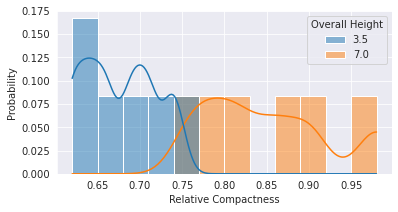

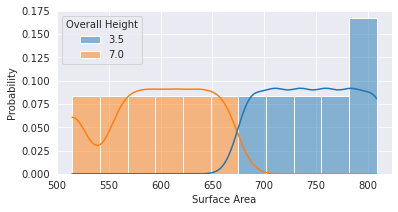

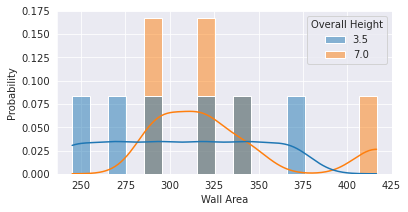

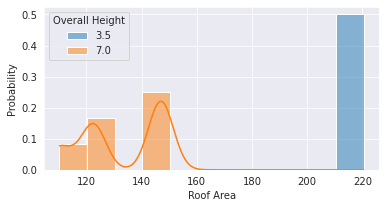

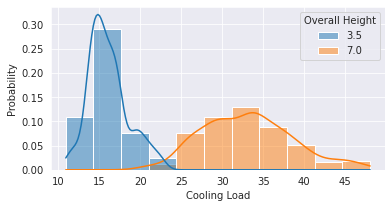

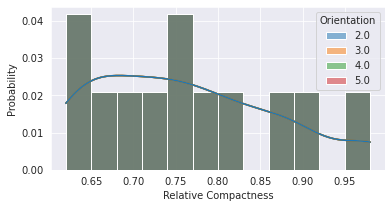

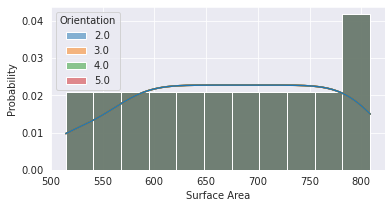

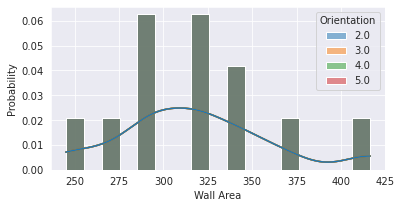

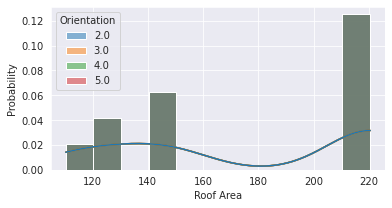

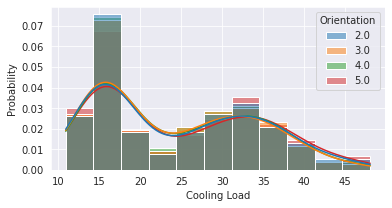

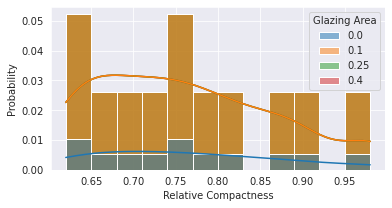

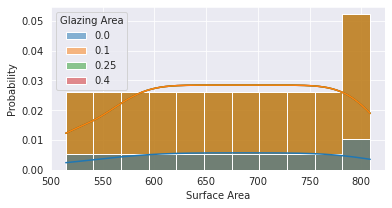

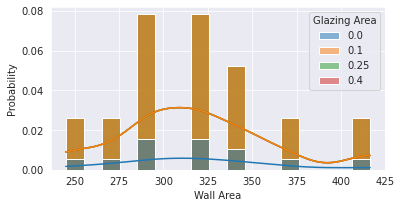

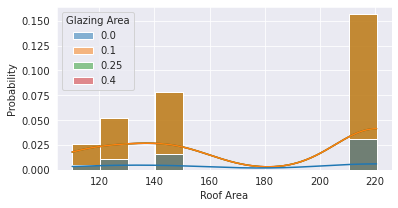

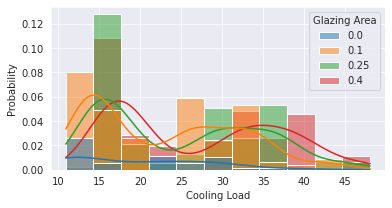

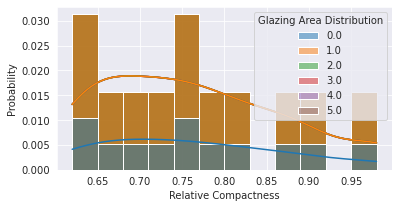

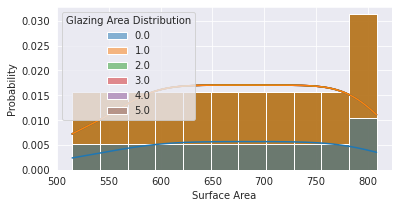

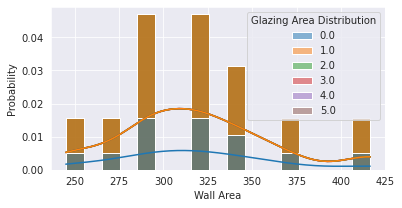

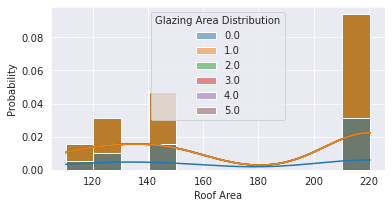

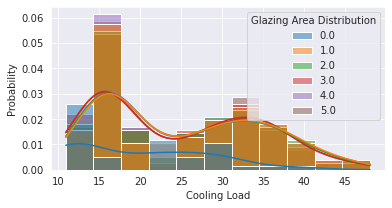

In [454]:
for c_n in categorical_names_2:
    for col in data_raw_2.columns:
        if col in numerical_names_2:
            fig, ax = plt.subplots(figsize=(6, 3))
            sns.histplot(data=data_raw_2, x=col,
                         kde=True,
                         hue=c_n,
                         stat='probability')
            plt.show()

Вывод: распределения по категориям примерно похожи. Нет смысла разделять данные.

# 5) Визуализация парных графиков. Корреляции (Часть 2. 05/04/2022)

## Scatter plot

Пример для одной пары переменных.

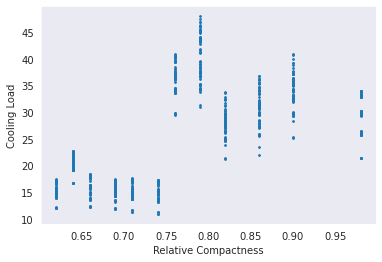

In [455]:
# зададим параметры
x_name = 'Relative Compactness'
y_name = 'Cooling Load'
x = data_raw[x_name]
y = data_raw[y_name]

fig, ax = plt.subplots()
ax.scatter(x, y, s=3)
ax.set_xlabel(x_name)
ax.set_ylabel(y_name)
ax.grid()
plt.show()

### Pair Plot Seaborn

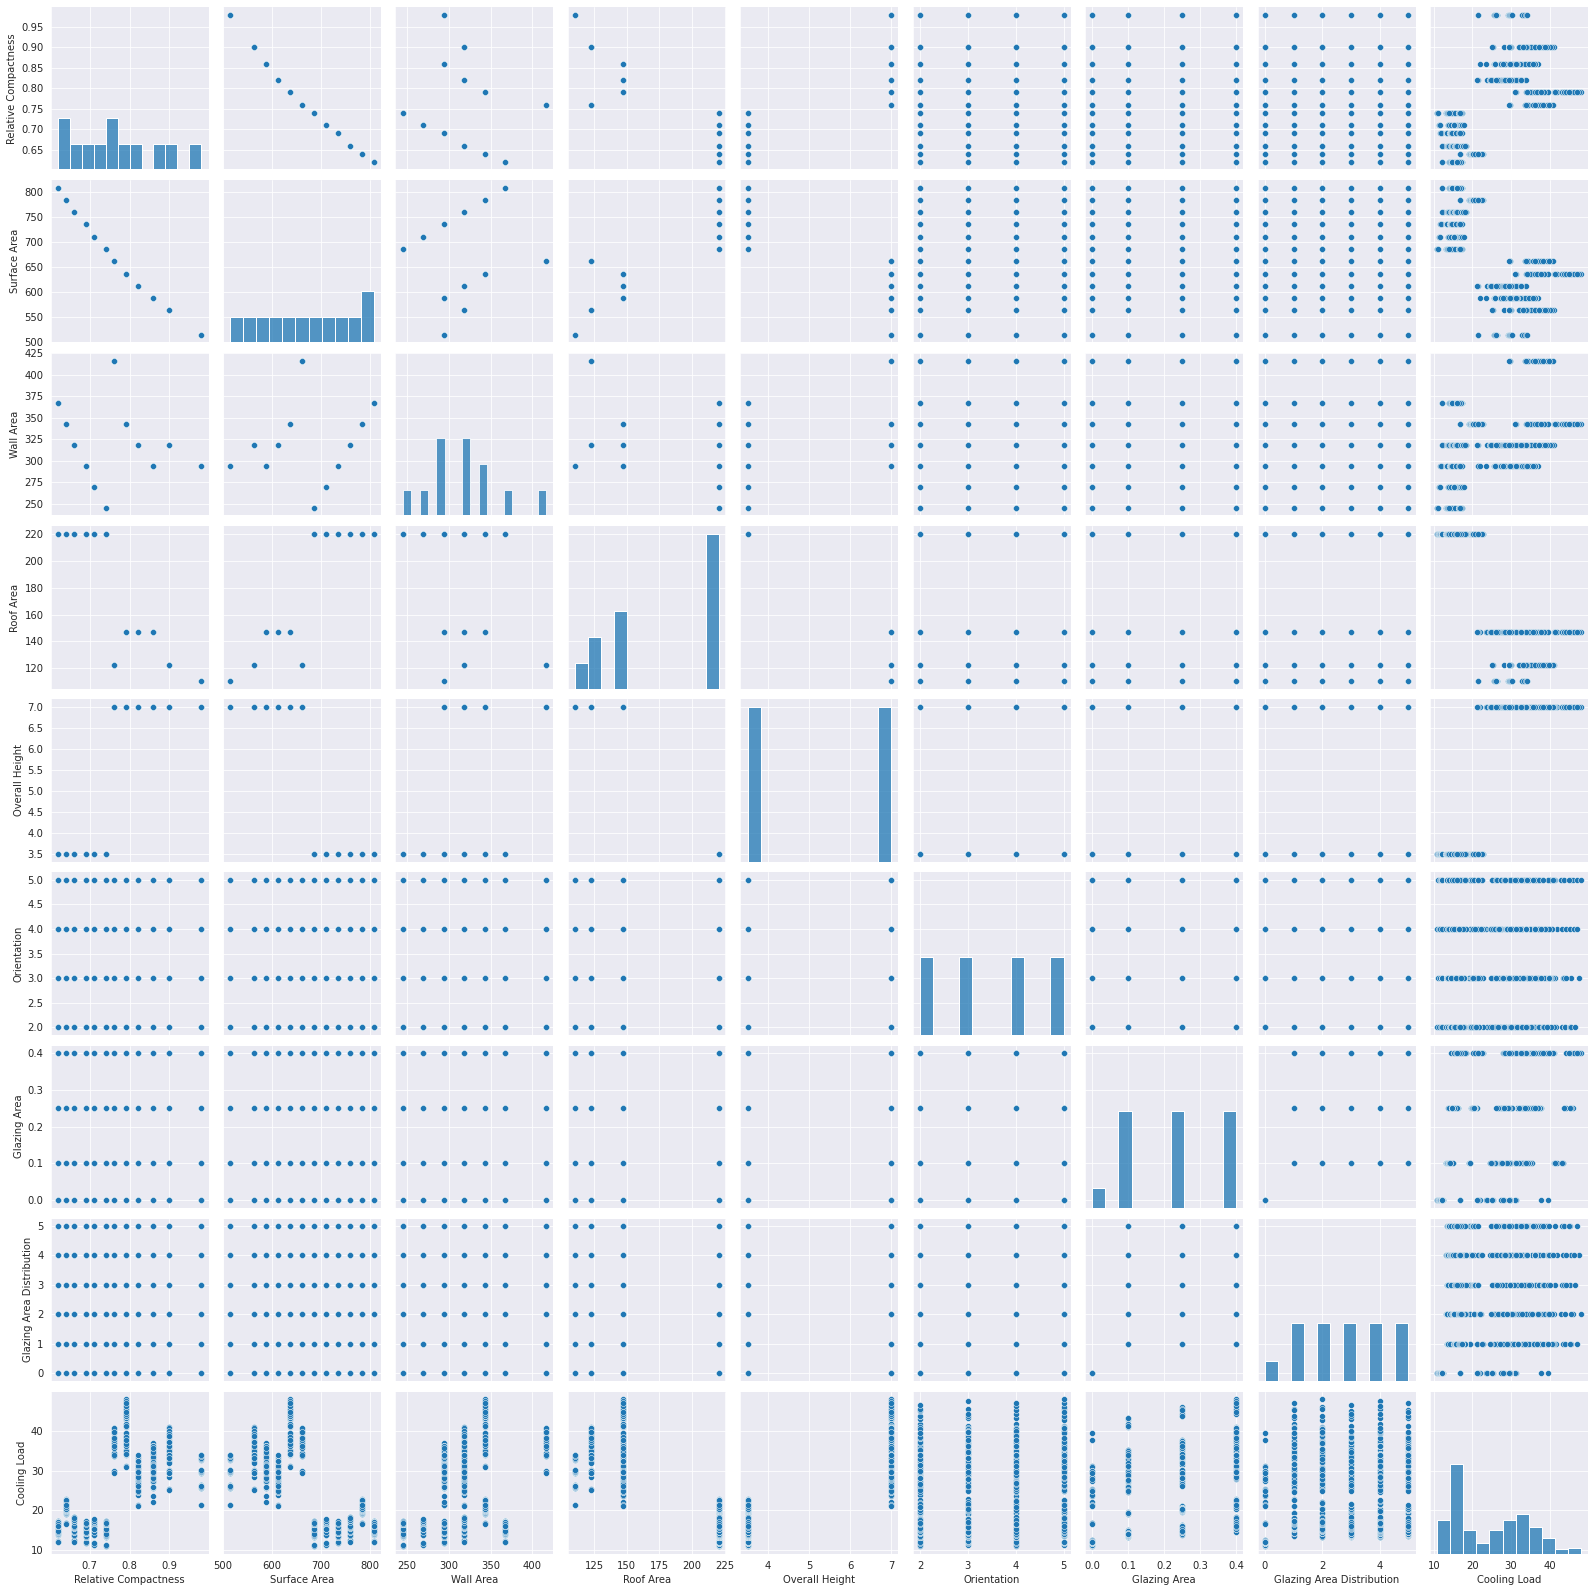

In [456]:
sns.pairplot(data=data_raw, kind='scatter')
plt.show()

## 5.3) Корреляции

Корреляционная матрица.

In [457]:
data_raw.corr()

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Cooling Load
Relative Compactness,1.000000e+00,-9.919015e-01,-2.037817e-01,-8.688234e-01,8.277473e-01,4.678592e-17,-2.960552e-15,-7.107006e-16,0.634339
Surface Area,-9.919015e-01,1.000000e+00,1.955016e-01,8.807195e-01,-8.581477e-01,-3.459372e-17,3.636925e-15,2.438409e-15,-0.672999
Wall Area,-2.037817e-01,1.955016e-01,1.000000e+00,-2.923165e-01,2.809757e-01,-2.429499e-17,-8.567455e-17,2.067384e-16,0.427117
Roof Area,-8.688234e-01,8.807195e-01,-2.923165e-01,1.000000e+00,-9.725122e-01,-5.830058e-17,-1.759011e-15,-1.078071e-15,-0.862547
Overall Height,8.277473e-01,-8.581477e-01,2.809757e-01,-9.725122e-01,1.000000e+00,4.492205e-17,1.489134e-17,-2.920613e-17,0.895785
Orientation,4.678592e-17,-3.459372e-17,-2.429499e-17,-5.830058e-17,4.492205e-17,1.000000e+00,-9.406007e-16,-2.549352e-16,0.014290
Glazing Area,-2.960552e-15,3.636925e-15,-8.567455e-17,-1.759011e-15,1.489134e-17,-9.406007e-16,1.000000e+00,2.129642e-01,0.207505
Glazing Area Distribution,-7.107006e-16,2.438409e-15,2.067384e-16,-1.078071e-15,-2.920613e-17,-2.549352e-16,2.129642e-01,1.000000e+00,0.050525
Cooling Load,6.343391e-01,-6.729989e-01,4.271170e-01,-8.625466e-01,8.957852e-01,1.428960e-02,2.075050e-01,5.052512e-02,1.000000


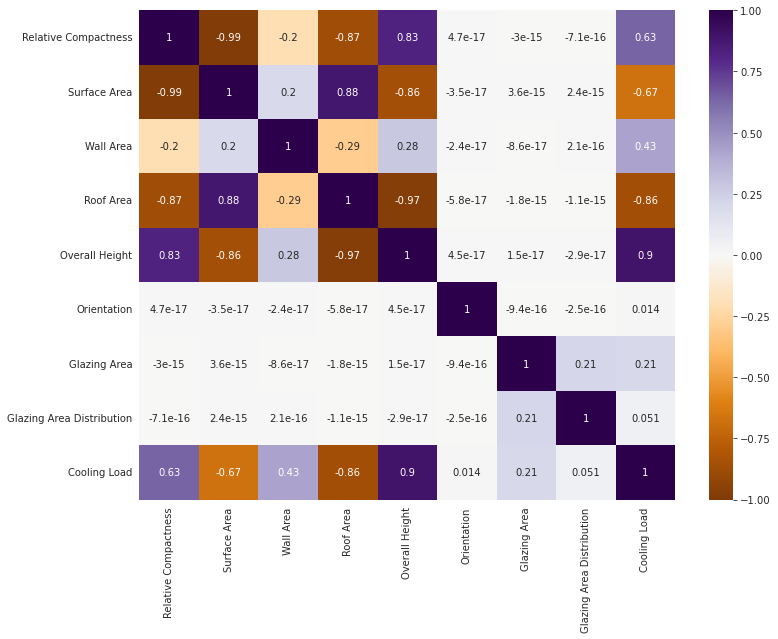

In [458]:
_, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(data=data_raw.corr(),
            annot=True, vmin=-1, vmax=1,
            cmap='PuOr')
plt.show()

Покажем "сильные" и "средние" корреляции. Необходимо задать порог!

In [459]:
# Пример. Сильные - corr>0.65 И corr<-0.65 (исключим 1)
data_raw.corr()[(data_raw.corr() > 0.65) &
                      (data_raw.corr() < 1) |
                      (data_raw.corr() < -0.65) &
                      (data_raw.corr() > -1)]

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Cooling Load
Relative Compactness,NaN,-0.991901,NaN,-0.868823,0.827747,NaN,NaN,NaN,NaN
Surface Area,-0.991901,NaN,NaN,0.880720,-0.858148,NaN,NaN,NaN,-0.672999
Wall Area,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Roof Area,-0.868823,0.880720,NaN,NaN,-0.972512,NaN,NaN,NaN,-0.862547
Overall Height,0.827747,-0.858148,NaN,-0.972512,NaN,NaN,NaN,NaN,0.895785
Orientation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Glazing Area,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Glazing Area Distribution,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Cooling Load,NaN,-0.672999,NaN,-0.862547,0.895785,NaN,NaN,NaN,NaN


In [460]:
# Пример. Средние - corr=[0.3, 0.65] И corr=[-0.65, -0.3]
data_raw.corr()[(data_raw.corr() > 0.3) &
                      (data_raw.corr() <= 0.65) |
                      (data_raw.corr() >= -0.65) &
                      (data_raw.corr() < -0.3)]

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Cooling Load
Relative Compactness,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.634339
Surface Area,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Wall Area,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.427117
Roof Area,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Overall Height,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Orientation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Glazing Area,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Glazing Area Distribution,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Cooling Load,0.634339,NaN,0.427117,NaN,NaN,NaN,NaN,NaN,NaN


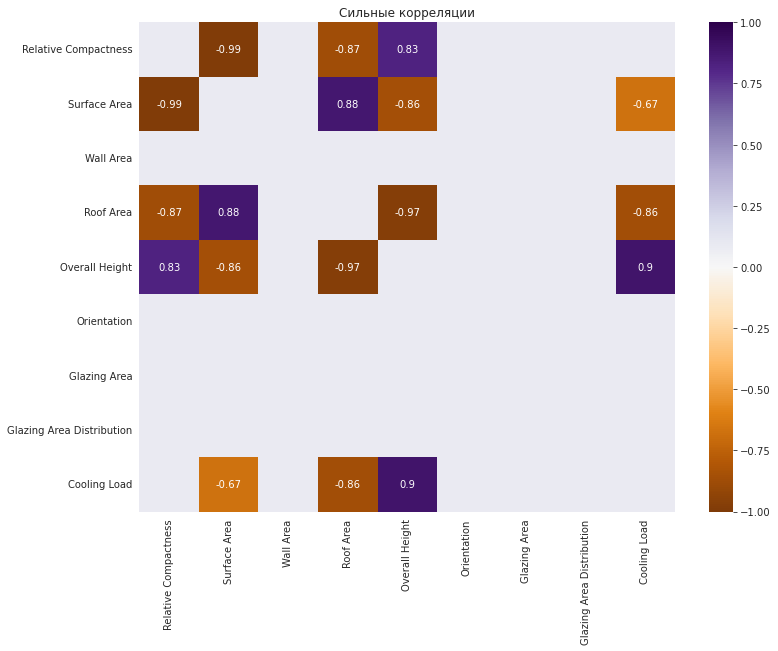

In [461]:
_, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(data=data_raw.corr()[(data_raw.corr() > 0.65) &
                                       (data_raw.corr() < 1) |
                                       (data_raw.corr() < -0.65) &
                                       (data_raw.corr() > -1)],
            annot=True, vmin=-1, vmax=1,
            cmap='PuOr')
ax.set_title('Сильные корреляции')
plt.show()

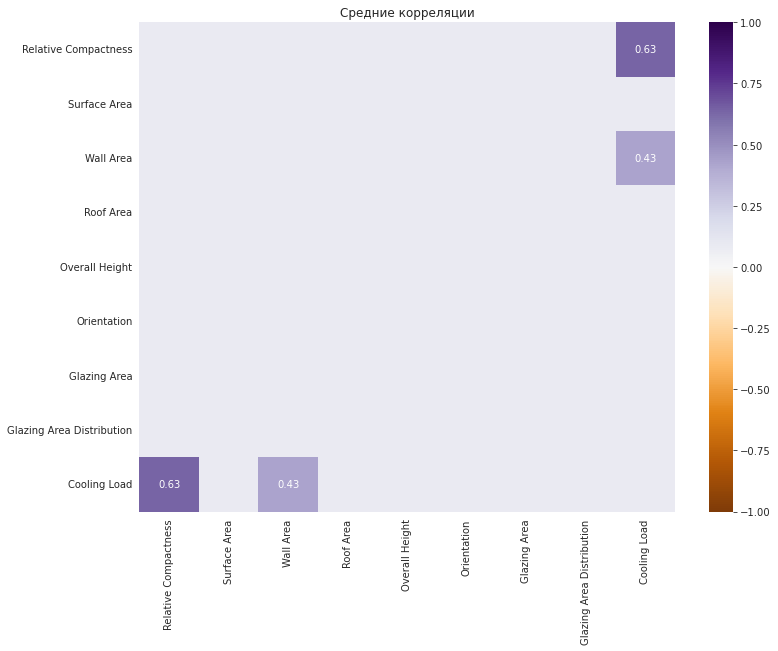

In [462]:
_, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(data=data_raw.corr()[(data_raw.corr() > 0.3) &
                                       (data_raw.corr() <= 0.65) |
                                       (data_raw.corr() >= -0.65) &
                                       (data_raw.corr() < -0.3)],
            annot=True, vmin=-1, vmax=1,
            cmap='PuOr')
ax.set_title('Средние корреляции')
plt.show()

**Выводы.** 

Сильные корреляции между независимыми и зависимой переменными присутствуют.

# 6) Метод главных компонент (МГК, Principle component analysis, PCA)

## 6.1) МГК без нормировки

https://scikit-learn.org

https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html#sklearn.decomposition.PCA 

Синтаксис sklearn:


1.   объявить метод
2.   обучить метод ( fit(x) или fit(x,y) )
3.   применить метод ( transform(x) или predict(x) )

P.S. 2+3 fit_transform(x)

In [463]:
input_names = ['Relative Compactness',
               'Surface Area',
               'Wall Area',
               'Roof Area',
               'Overall Height',
               'Orientation',
               'Glazing Area',
               'Glazing Area Distribution']
target_names = ['Cooling Load']

In [464]:
X = data_raw[input_names].values
X[0:3]

array([[  0.98, 514.5 , 294.  , 110.25,   7.  ,   2.  ,   0.  ,   0.  ],
       [  0.98, 514.5 , 294.  , 110.25,   7.  ,   3.  ,   0.  ,   0.  ],
       [  0.98, 514.5 , 294.  , 110.25,   7.  ,   4.  ,   0.  ,   0.  ]])

In [465]:
my_pca_01 = PCA()
my_pca_01.fit(X)
Z = my_pca_01.transform(X)
Z[0:3]

array([[ 1.71647343e+02, -1.60408474e+01,  2.81633988e+00,
         1.50000000e+00,  7.58471832e-01, -1.82531040e-01,
        -1.24117263e-02, -3.02115201e-15],
       [ 1.71647343e+02, -1.60408474e+01,  2.81633988e+00,
         5.00000000e-01,  7.58471832e-01, -1.82531040e-01,
        -1.24117263e-02, -3.31616261e-15],
       [ 1.71647343e+02, -1.60408474e+01,  2.81633988e+00,
        -5.00000000e-01,  7.58471832e-01, -1.82531040e-01,
        -1.24117263e-02, -3.61117320e-15]])

Доля объясненной дисперсии

In [466]:
print(my_pca_01.explained_variance_ratio_ * 100)

[8.07032434e+01 1.92639516e+01 2.05504811e-02 1.06893310e-02
 1.41960454e-03 1.44648296e-04 9.05142690e-07 5.77970873e-30]


Z в DataFrame

In [467]:
pca_names = []
for i in range(len(input_names)):
    pca_names.append('pca_' + str(i + 1))
pca_names

['pca_1', 'pca_2', 'pca_3', 'pca_4', 'pca_5', 'pca_6', 'pca_7', 'pca_8']

In [468]:
pca_data_01 = pd.DataFrame(Z, columns=pca_names)
pca_data_01['Cooling Load'] = data_raw['Cooling Load'].copy()
pca_data_01.head(3)

,pca_1,pca_2,pca_3,pca_4,pca_5,pca_6,pca_7,pca_8,Cooling Load
0,171.647343,-16.040847,2.81634,1.5,0.758472,-0.182531,-0.012412,-3.021152e-15,21.33
1,171.647343,-16.040847,2.81634,0.5,0.758472,-0.182531,-0.012412,-3.316163e-15,21.33
2,171.647343,-16.040847,2.81634,-0.5,0.758472,-0.182531,-0.012412,-3.611173e-15,21.33


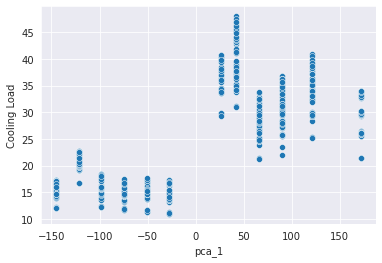

In [469]:
sns.scatterplot(data=pca_data_01, x='pca_1', y='Cooling Load')
plt.show()

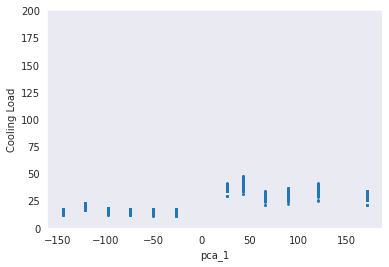

In [470]:
fig, ax = plt.subplots()
ax.scatter(pca_data_01['pca_1'], pca_data_01['Cooling Load'], s=3)
ax.grid()
ax.set_xlabel('pca_1')
ax.set_ylabel('Cooling Load')
ax.set_ylim(0, 200)
plt.show()

График по 2м главным компонентам

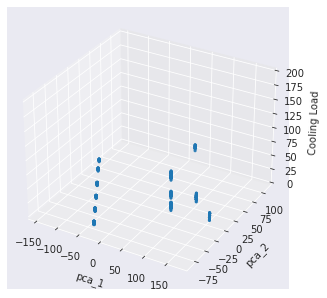

In [471]:
fig = plt.figure(constrained_layout=True)
ax = fig.add_subplot(projection='3d')
ax.scatter(pca_data_01['pca_1'], pca_data_01['pca_2'],
           pca_data_01['Cooling Load'], s=4)
ax.set_xlabel('pca_1')
ax.set_ylabel('pca_2')
ax.set_zlabel('Cooling Load')
ax.set_zlim(0, 200)
plt.show()

## 6.2) МГК с нормировкой

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html#sklearn.preprocessing.MinMaxScaler

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler 

In [472]:
# data_cropped = data_raw.drop('Heating Load', 1).reset_index(drop=True)

scaler1 = MinMaxScaler()
scaler1.fit(data_raw[input_names].values)
scaled_data_1 = scaler1.transform(data_raw[input_names].values)
data_raw.head()

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Cooling Load
0,0.98,514.5,294.0,110.25,7.0,2.0,0.0,0.0,21.33
1,0.98,514.5,294.0,110.25,7.0,3.0,0.0,0.0,21.33
2,0.98,514.5,294.0,110.25,7.0,4.0,0.0,0.0,21.33
3,0.98,514.5,294.0,110.25,7.0,5.0,0.0,0.0,21.33
4,0.90,563.5,318.5,122.50,7.0,2.0,0.0,0.0,28.28


In [473]:
scaled_data_1 = pd.DataFrame(scaled_data_1)

scaled_data_1['Cooling Load'] = data_raw['Cooling Load'].copy()
scaled_data_1.columns = data_raw.columns

scaled_data_1.reset_index()
scaled_data_1.head(3)

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Cooling Load
0,1.0,0.0,0.285714,0.0,1.0,0.000000,0.0,0.0,21.33
1,1.0,0.0,0.285714,0.0,1.0,0.333333,0.0,0.0,21.33
2,1.0,0.0,0.285714,0.0,1.0,0.666667,0.0,0.0,21.33


In [474]:
scaled_data_1.describe()

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Cooling Load
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,0.400463,0.534722,0.428571,0.601852,0.500000,0.500000,0.585938,0.562500,24.587760
std,0.293826,0.299613,0.254382,0.409668,0.500326,0.372921,0.333051,0.310192,9.513306
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.900000
25%,0.173611,0.312500,0.285714,0.277778,0.000000,0.250000,0.250000,0.350000,15.620000
50%,0.361111,0.541667,0.428571,0.666667,0.500000,0.500000,0.625000,0.600000,22.080000
75%,0.583333,0.770833,0.571429,1.000000,1.000000,0.750000,1.000000,0.800000,33.132500
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,48.030000


In [475]:
scaler2 = StandardScaler()
scaled_data_2 = scaler2.fit_transform(data_raw[input_names].values)

In [476]:
scaled_data_2 = pd.DataFrame(scaled_data_2)
scaled_data_2['Cooling Load'] = data_raw['Cooling Load'].copy()
scaled_data_2.columns = data_raw.columns
scaled_data_2.head(3)

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Cooling Load
0,2.041777,-1.785875,-0.561951,-1.470077,1.0,-1.341641,-1.760447,-1.814575,21.33
1,2.041777,-1.785875,-0.561951,-1.470077,1.0,-0.447214,-1.760447,-1.814575,21.33
2,2.041777,-1.785875,-0.561951,-1.470077,1.0,0.447214,-1.760447,-1.814575,21.33


In [477]:
scaled_data_2.describe()

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Cooling Load
count,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,768.000000,768.000000,7.680000e+02,7.680000e+02,768.000000
mean,-1.451385e-16,-4.440892e-16,-1.734723e-18,3.709417e-16,0.000000,0.000000,2.064321e-15,-8.910696e-16,24.587760
std,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652,1.000652,1.000652e+00,1.000652e+00,9.513306
min,-1.363812e+00,-1.785875e+00,-1.685854e+00,-1.470077e+00,-1.000000,-1.341641,-1.760447e+00,-1.814575e+00,10.900000
25%,-7.725642e-01,-7.421818e-01,-5.619515e-01,-7.915797e-01,-1.000000,-0.670820,-1.009323e+00,-6.855062e-01,15.620000
50%,-1.340162e-01,2.319318e-02,0.000000e+00,1.583159e-01,0.000000,0.000000,1.173631e-01,1.209717e-01,22.080000
75%,6.227813e-01,7.885681e-01,5.619515e-01,9.725122e-01,1.000000,0.670820,1.244049e+00,7.661539e-01,33.132500
max,2.041777e+00,1.553943e+00,2.247806e+00,9.725122e-01,1.000000,1.341641,1.244049e+00,1.411336e+00,48.030000


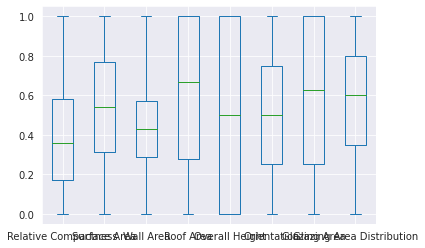

In [478]:
scaled_data_1[input_names].plot(kind='box')
plt.show()

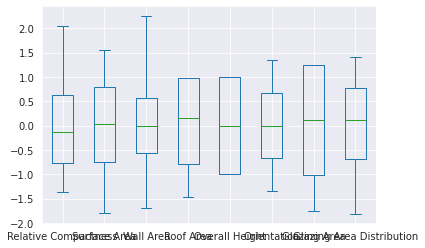

In [479]:
scaled_data_2[input_names].plot(kind='box')
plt.show()

In [480]:
my_pca_02 = PCA()
Z2 = my_pca_02.fit_transform(scaled_data_2[input_names])
Z2[0:3]

array([[ 3.12895415e+00, -9.02373432e-01,  2.52792238e+00,
        -1.34164079e+00, -3.82743898e-02,  4.77611838e-01,
        -4.86937592e-02, -2.23608880e-15],
       [ 3.12895415e+00, -9.02373432e-01,  2.52792238e+00,
        -4.47213595e-01, -3.82743898e-02,  4.77611838e-01,
        -4.86937592e-02,  2.14202544e-16],
       [ 3.12895415e+00, -9.02373432e-01,  2.52792238e+00,
         4.47213595e-01, -3.82743898e-02,  4.77611838e-01,
        -4.86937592e-02,  5.08209069e-15]])

In [481]:
pca_data_02 = pd.DataFrame(Z2, columns=pca_names)
pca_data_02['Cooling Load'] = data_raw['Cooling Load'].copy()
pca_data_02.head(3)

,pca_1,pca_2,pca_3,pca_4,pca_5,pca_6,pca_7,pca_8,Cooling Load
0,3.128954,-0.902373,2.527922,-1.341641,-0.038274,0.477612,-0.048694,-2.236089e-15,21.33
1,3.128954,-0.902373,2.527922,-0.447214,-0.038274,0.477612,-0.048694,2.142025e-16,21.33
2,3.128954,-0.902373,2.527922,0.447214,-0.038274,0.477612,-0.048694,5.082091e-15,21.33


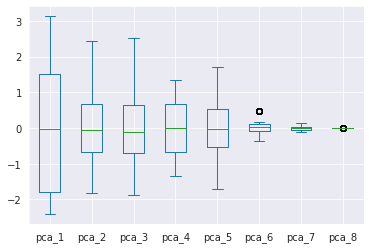

In [482]:
pca_data_02[pca_names].plot(kind='box')
plt.show()

# 7) Линейная регрессия. Оценка важности переменных

## 7.1) Линейная регрессия по исходным нормированным данным

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression 

In [483]:
x = scaled_data_1[input_names].values
y = scaled_data_1[target_names].values

In [484]:
linear_model_1 = LinearRegression()
linear_model_1.fit(x, y)

LinearRegression()

In [485]:
predicted_y = linear_model_1.predict(x)

Ошибки по разным метрикам

In [486]:
print('MSE =', mean_squared_error(y, predicted_y))

MSE = 10.14089180850573


In [487]:
print('R2 =', r2_score(y, predicted_y))

R2 = 0.8878035507251569


In [488]:
print('Коэффициенты при х (slope)', linear_model_1.coef_)
print('Свободный член (intercept)', linear_model_1.intercept_)

Коэффициенты при х (slope) [[-25.48357453  -9.95996986  -1.66104627 -11.98803494  14.99345164
    0.36453125   5.88682733   0.2034863 ]]
Свободный член (intercept) [36.80293802]


In [489]:
print('Коэффициенты при х (slope):')
for i in range(5):
    print('  ', input_names[i], ':', linear_model_1.coef_[0][i])
print('Свободный член (intercept)', linear_model_1.intercept_)

Коэффициенты при х (slope):
   Relative Compactness : -25.483574526181744
   Surface Area : -9.959969862329903
   Wall Area : -1.661046273808938
   Roof Area : -11.98803493681068
   Overall Height : 14.993451636862398
Свободный член (intercept) [36.80293802]


## 7.2) Линейная регрессия по нормированным данным МГК

In [490]:
x2 = pca_data_02['pca_1'].values
y2 = pca_data_02[target_names].values

In [491]:
linear_model_2 = LinearRegression()
linear_model_2.fit(x2.reshape(-1, 1), y2)
predicted_y_2 = linear_model_2.predict(x2.reshape(-1, 1))

In [492]:
print('MSE =', mean_squared_error(y2, predicted_y_2))
print('R2 =', r2_score(y2, predicted_y_2))

MSE = 32.02732929092264
R2 = 0.6456571380454181


In [493]:
print('Коэффициенты при х (slope)', linear_model_2.coef_)
print('Свободный член (intercept)', linear_model_2.intercept_)

Коэффициенты при х (slope) [[3.96986923]]
Свободный член (intercept) [24.58776042]


In [494]:
x_line = np.array([-3, 3])
y_line = linear_model_2.coef_[0] * x_line + linear_model_2.intercept_

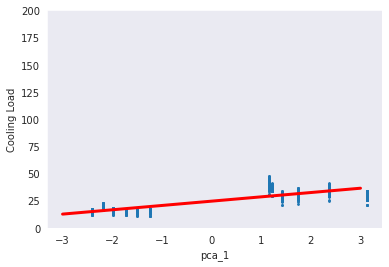

In [495]:
fig, ax = plt.subplots()
ax.scatter(pca_data_02['pca_1'], pca_data_02['Cooling Load'], s=3)
ax.plot(x_line, y_line, color='red', lw=3)
ax.grid()
ax.set_xlabel('pca_1')
ax.set_ylabel('Cooling Load')
ax.set_ylim(0, 200)
plt.show()